In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme('paper')

In [6]:
def calculate_completeness(row):
        return row[row['Goal_type']] /row['Goal_value']*100

In [7]:
df1 = pd.read_parquet('game_overs_compact.parquet')

In [8]:
# Read Dataframe
#df1 = pd.read_csv('game_overs_compact.csv')

df =df1[['device_id', 'date_time', 'level_number', 
        'end_reason', 'lives_left','n_bananavalue', 'n_distance',
        'n_specialcollectibles', 'n_swings', 'pathtrace',
        'stars','swings_left', 'time_used', 'total_duration','score']]


df = df.rename(columns={'n_bananavalue':'n_bananas'})

In [9]:
#Read level configurations
levels= pd.read_csv('levels.csv')
levels = levels.rename(columns={'lvl': 'level_number'})

In [10]:
#merge both dataframes
df_f = pd.merge(df,levels,on='level_number')

In [11]:
# calculate completeness of the level based on the level goal
df_f['completeness'] = df_f.apply(calculate_completeness, axis=1)

In [12]:
# slice the lost attempts
df_l = df_f[~df_f['end_reason'].isin(['win'])]
df_l_g =df_l.groupby(by='level_number')['completeness'].agg(['mean', 'median', 'max', 'count'])

# slice the won attempts
df_w = df_f[df_f['end_reason'].isin(['win'])]
df_w_g =df_w.groupby(by='level_number')['completeness'].agg(['mean', 'median', 'min', 'count'])

# detect false positives
fp_l= df_l[df_l['completeness'] > 100]
fp_w= df_w[df_w['completeness'] < 100]

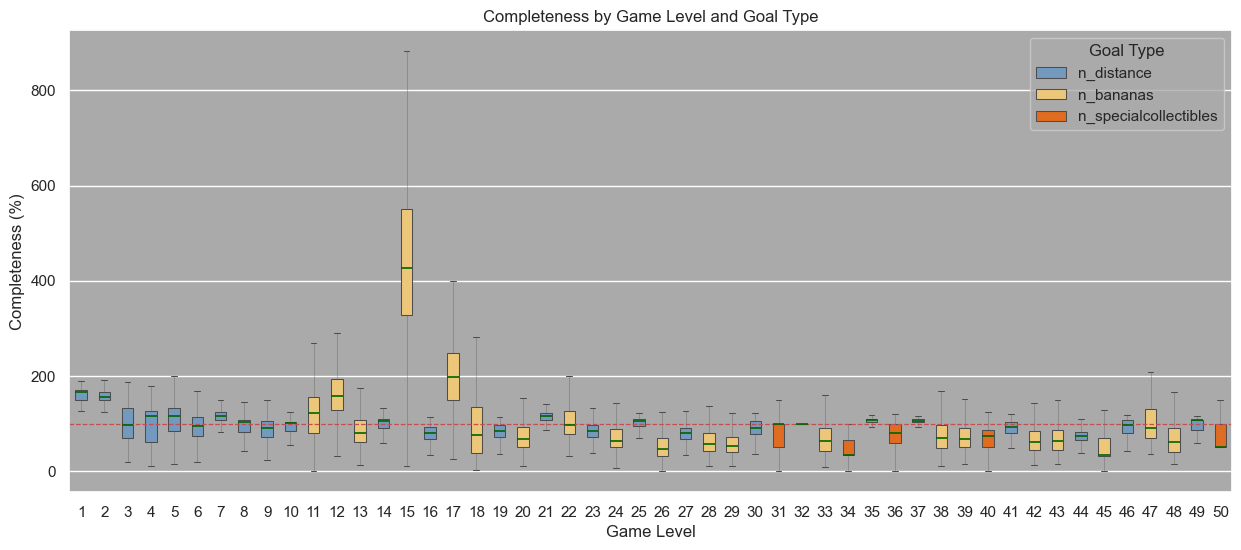

In [13]:
goal_colors = {
    'n_bananas':"#ffcc66",
    'n_distance': "#6699cc", # Light Blue
    'n_specialcollectibles': "#ff6600"  # Light Violet
}
sns.set(rc={'axes.facecolor':"#AAAAAA", 'figure.facecolor':"white"})
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=df_f, 
                    x="level_number", 
                    y="completeness",
                    medianprops={"color": "darkgreen", "linewidth": 1.2},
                    #fill=False,
                    linewidth=.75,
                    palette=goal_colors,
                    hue='Goal_type',
                    whiskerprops={'alpha': 0.3},

                    width=0.5,
                    showfliers=False
                    )
ax.axhline(y=100, xmin=0, xmax=1, linewidth=.9, color='r', linestyle='--')

for i, artist in enumerate(ax.artists):
        color_key = levels.iloc[i]['Goal_type']
        color = goal_colors[color_key]
        artist.set_edgecolor(color)

plt.title('Completeness by Game Level and Goal Type')
plt.xlabel('Game Level')
plt.ylabel('Completeness (%)')
plt.legend(title='Goal Type') # This legend is generated automatically by the 'hue' parameter
plt.savefig('./visualizations/boxplot_custom_border.png')
plt.show()

In [14]:
df_f_g = df_f.groupby(by='level_number')['completeness'].mean()

# plt.figure(figsize=(15, 6))
# barplot = sns.barplot(df_f_g)
# barplot.axhline(y=1, xmin=0, xmax=1, color='r')
# plt.show()